# Generate Simulated Data: Random-Plaintext-Dataset-4

In [2]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [3]:
# Define lengh for the data set
data_leng = 100000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldMaskedLekage = 24
fieldMasked = 4

#Random Plaintext
FixedPlaintext = False

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = True

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -5
    jitterRight = 5
else:
    jitterLeft = None
    jitterRight = None

# If masked used True 
maskedValue = True

In [4]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [5]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,100000,50,23,0.0,5.0,-5,5


In [6]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [7]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
mask = []
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))
    
    mask.append(random.randint(0,255))

print("plaintext:",plaintext[0:5],'\nmask',mask[0:5])

plaintext: [192, 2, 190, 162, 167] 
mask [207, 93, 140, 202, 94]


In [8]:
# Verify size of plaintext
len(plaintext)

100000

In [9]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [-4.44239708776325, 6.769325898007172, 7.025209734358974, 1.8381748383678502, 16.504185482307044] 
labels: [3, 4, 5, 5, 6]


In [10]:
# Verify size of leakedData 
len(leakedData)

100000

In [11]:
# Verify size of labels 
len(labels)

100000

In [12]:
maskedData = []
maskedNoise = []
maskIndex = 0
for d in plaintext:
    maskedData.append((bin(((AES_Sbox[d^key])^mask[maskIndex])).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise.append((bin(mask[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskIndex = maskIndex + 1
print("maskedData:",maskedData[0:5],"\nmaskedNoise:",maskedNoise[0:5])

maskedData: [1.012371203922125, -3.319417623370846e-05, 6.300069238969204, 7.733247685980079, 9.230958349085824] 
maskedNoise: [4.357300069262545, 17.00400305738913, -0.189556979093374, 5.058467016868899, 7.335287380437141]


In [13]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace sample at 5th position with the mask and added noise 
        if z == fieldMasked:
            rawData.append(maskedNoise[i])
            
        # Replace sample at 25th position with HW( sbox( plaintext xor key ) xor mask) + noise    
        elif z == fieldMaskedLekage:
            rawData.append(maskedData[i])
            
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart, noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  deque([9.374926523126975, 6.564730927021515, 2.306994321362106, 0.25099786188331885, 4.357300069262545, 7.796475835911679, 11.58189612290276, 7.222051744245355, 3.444456169609767, -9.697133127330662, 0.5763574946015986, 4.3326916489864145, -1.5941615516562821, 0.8475817484464832, 2.360221963153575, 19.019206753443655, 2.032856957097809, -4.548883064912925, 0.5596184300352531, -1.5860910727698494, 14.052057300701549, -6.718972566072445, 5.826498220296423, -6.798218774793785, 1.012371203922125, -5.788051169175972, 1.1064164269547705, 1.3640888917910903, 3.383224158812822, 6.153023752685147, -2.6746565243893468, 7.503382235374505, 2.9719327907923034, 0.1900997037740879, 7.9933227284513455, 8.438636728869092, 1.3155576655226962, 6.442446735456716, 2.709008479639542, 2.5029574397742373, -1.3922493623678722, 7.4087640756135364, 7.5886344759468995, 4.22338927696925, 7.756117568947502, 3.420282745858153, 5.94025269144752, 5.050434890768249, -5.242403722453923, -4.57753

In [14]:
# Verify size of leakedData 
len(rawTraces)

100000

## Plot Simulated Data

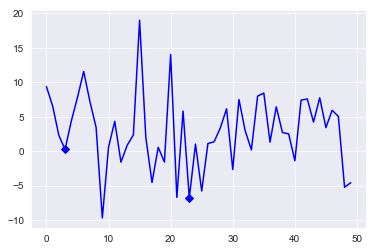

In [15]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[fieldMaskedLekage + randomJitter[0]-1,fieldMasked + randomJitter[0]-1])

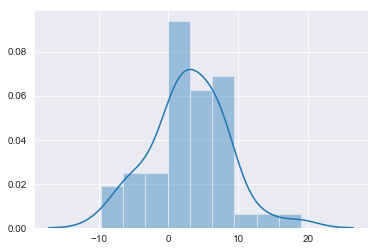

In [16]:
sns.distplot(rawTraces[0])

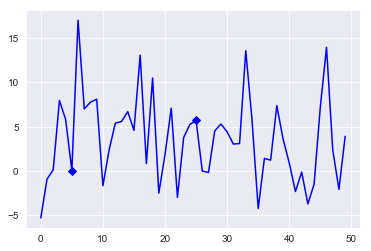

In [17]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldMaskedLekage + randomJitter[1]-1,fieldMasked + randomJitter[1]-1])

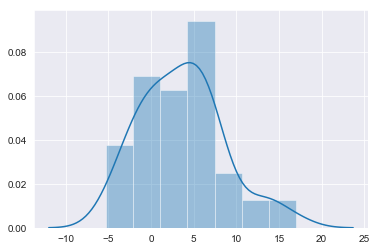

In [18]:
sns.distplot(rawTraces[1])

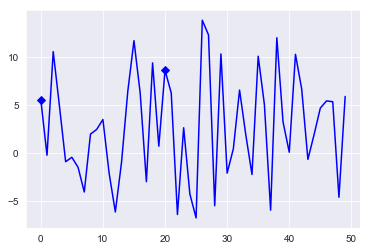

In [19]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldMaskedLekage + randomJitter[2]-1,fieldMasked + randomJitter[2]-1])

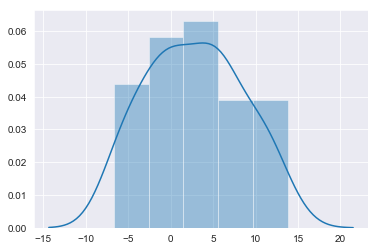

In [20]:
sns.distplot(rawTraces[2])

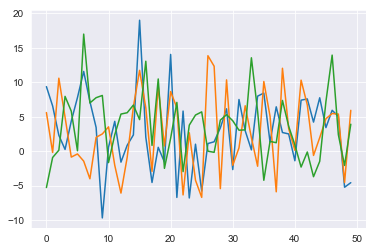

In [21]:
plt.plot(rawTraces[0],'-',rawTraces[2],'-',rawTraces[1],'-',markevery=[fieldMaskedLekage,fieldMasked])

### Data Path

In [22]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [23]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, False) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, True)
    def test_Mask(self):
        self.assertEqual(maskedValue, True)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'RandomPlaintext')
    
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Mask (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.027s

OK


In [24]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,9.374927,6.564731,2.306994,0.250998,4.357300,7.796476,11.581896,7.222052,3.444456,-9.697133,...,7.408764,7.588634,4.223389,7.756118,3.420283,5.940253,5.050435,-5.242404,-4.577538,192
1,-5.288267,-0.917628,0.136610,7.959087,5.814165,0.056178,17.004003,7.003854,7.768027,8.092408,...,-2.308846,-0.119686,-3.710269,-1.474787,7.216634,13.952943,2.388191,-2.073087,3.914612,2
2,5.610173,-0.189557,10.599852,4.949760,-0.861589,-0.402992,-1.445357,-4.013564,2.010926,2.500395,...,10.314525,6.716088,-0.621044,1.966450,4.718987,5.468604,5.385585,-4.561109,5.932240,190
3,5.275307,3.287649,-0.847729,-5.728015,4.019205,4.036290,10.932505,5.058467,8.131388,-0.938850,...,11.449362,-5.895908,11.518851,9.322436,0.125369,6.427114,6.603968,-5.355666,13.293532,162
4,10.610560,0.647474,6.936907,5.844339,-0.494385,-0.560587,5.692838,-1.135726,7.335287,5.316486,...,5.045319,2.368603,7.833390,2.919430,4.761157,6.879309,2.220481,2.937446,4.300062,167


### Write Data 

In [25]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS4.csv',index=False)